<a href="https://colab.research.google.com/github/tiagopessoalima/covid-19/blob/master/pernambuco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descrição**
As informações exibidas são oriundas de uma planilha alimentada pela Secretaria de Planejamento e Gestão (SEPLAG) em parceria com a Secretaria Estadual de Saúde (SES) e a Agência Estadual de Tecnologia da Informação (ATI). Considerando grupos de paientes (óbitos, recuperados, transmissores, em isolamento, enfermaria e uti), analiso aqui comorbidades, data do óbito, dias para o óbito, hospitalização, municipio, sexo e sintomas.

**Bibliotecas**

In [0]:
import pandas as pd

**Dados**

In [0]:
pernambuco = pd.read_csv('https://raw.githubusercontent.com/tiagopessoalima/covid-19/master/dados/pernambuco.csv',sep=';')
pernambuco = pernambuco[pernambuco.classe=='CONFIRMADO']

In [0]:
#pernambuco = pernambuco[pernambuco['comorbidades'].str.contains("CANCER|CARCINOMA|LEUCEMIA|ONCOLOG|NEOPLASIA", na=False)]
pernambuco = pernambuco[(pernambuco.faixa_etaria=='0-9 anos') | (pernambuco.faixa_etaria=='10-19 anos')]

In [0]:
obito = pernambuco[pernambuco.evolucao=='OBITO']
recuperados = pernambuco[pernambuco.evolucao=='RECUPERADO']
transmissores = pernambuco[(pernambuco.evolucao=='ISOLAMENTO DOMICILIAR') | (pernambuco.evolucao=='INTERNADO LEITO DE ISOLAMENTO') | (pernambuco.evolucao=='INTERNADO UTI')]
isolamento = pernambuco[pernambuco.evolucao=='ISOLAMENTO DOMICILIAR']
enfermaria = pernambuco[pernambuco.evolucao=='INTERNADO LEITO DE ISOLAMENTO']
uti = pernambuco[pernambuco.evolucao=='INTERNADO UTI']

##**Resumo**
São exibidos o número com seu respectivo percentual. Considero aqui que cada individuo pode estar em três grupos: óbito, recuperado ou transmissor. No caso dos transmissores, o mesmo pode estar: em isolamento, enfermaria ou uti. O cálculo do percentual destes sub-grupos considerou o número de transmissores. Salienta-se que no decorrer do tempo, os transmissores migram para o grupo de óbito ou recuperado. O grupo indefinido é formado por indivíduos em que a evolução não foi especificada.

In [84]:
num_obi, num_rec, num_tra = len(obito), len(recuperados), len(transmissores) 
num_iso, num_enf, num_uti = len(isolamento), len(enfermaria), len(uti)
num_per = len(pernambuco)

print('\nÓbitos:', num_obi)
print('Percentual:', 100*(num_obi/(num_obi+num_rec+num_tra)))

print('\nRecuperados:', num_rec)
print('Percentual:', 100*(num_rec/(num_obi+num_rec+num_tra)))

print('\nTransmissores:', num_tra)
print('Percentual:', 100*(num_tra/(num_obi+num_rec+num_tra)))

print('\n\t- Isolamento:', num_iso)
print('\t  Percentual:', 100*(num_iso/num_tra))

print('\n\t- Enfermaria:', num_enf)
print('\t  Percentual:', 100*(num_enf/num_tra))

print('\n\t- UTI:', num_uti)
print('\t  Percentual:', 100*(num_uti/num_tra))

print('\nIndefinido:', (num_per - num_obi - num_rec - num_tra))
print('Percentual:', 100*((num_per - num_obi - num_rec - num_tra)/num_per))


Óbitos: 19
Percentual: 3.209459459459459

Recuperados: 401
Percentual: 67.73648648648648

Transmissores: 172
Percentual: 29.054054054054053

	- Isolamento: 27
	  Percentual: 15.69767441860465

	- Enfermaria: 137
	  Percentual: 79.65116279069767

	- UTI: 8
	  Percentual: 4.651162790697675

Indefinido: 571
Percentual: 49.09716251074806


##**Comorbidades**

In [0]:
def plotar_comorbidades(grupo):
    comorbidades = grupo.groupby('comorbidades').size()
    if len(comorbidades) > 0:
      comorbidades.sort_values(inplace=True)
      comorbidades.plot.bar(figsize=(30,5))
    else:
      print('Não há indivíduos neste grupo!')

**Óbito**

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


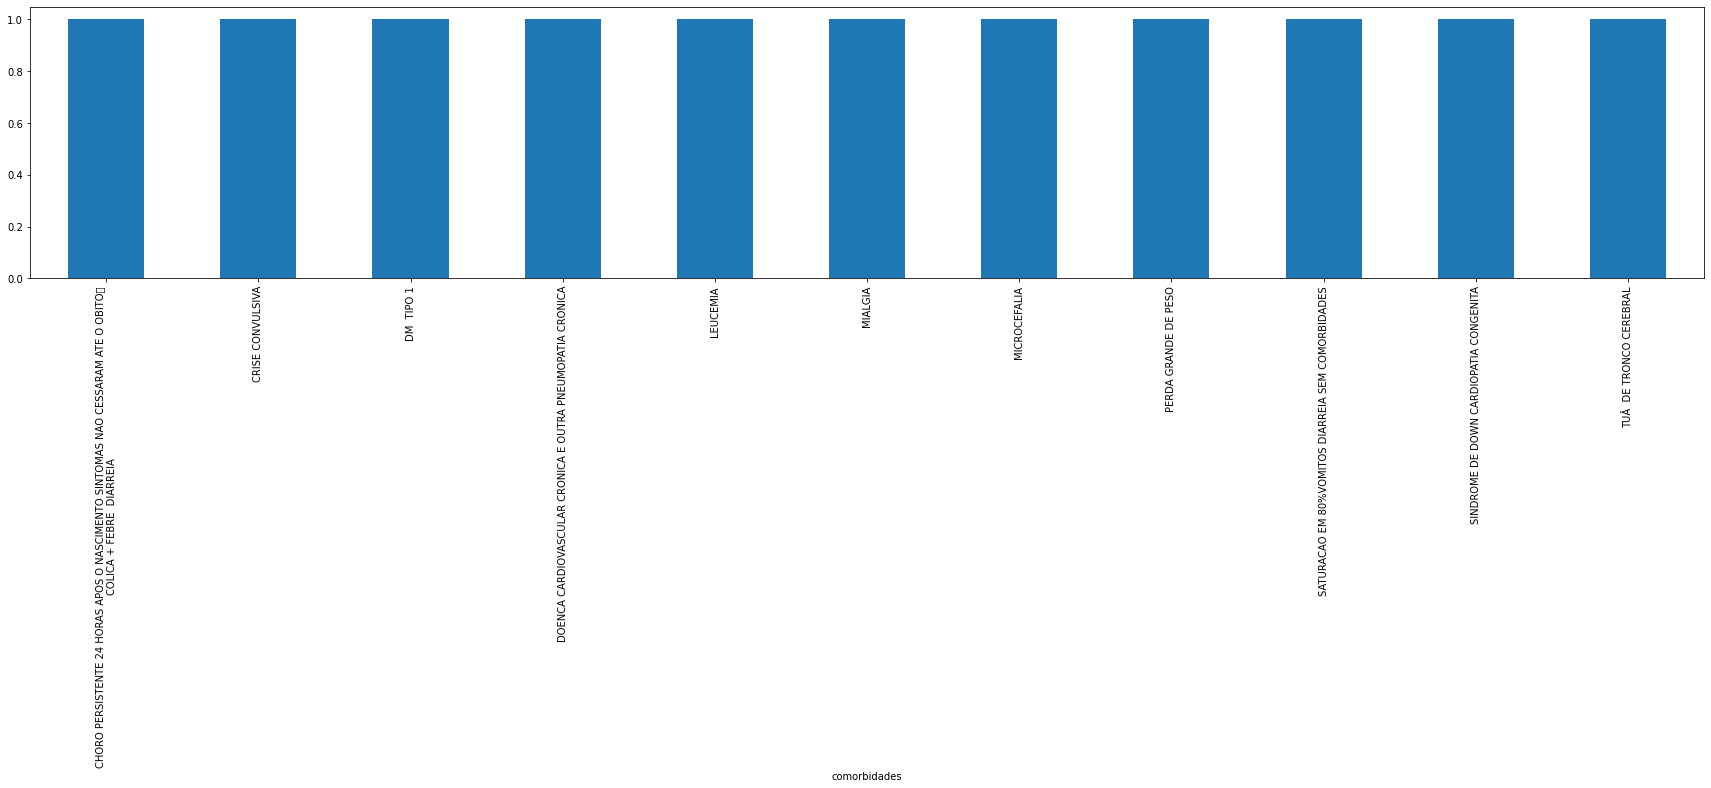

In [86]:
plotar_comorbidades(obito)

**Recuperados**

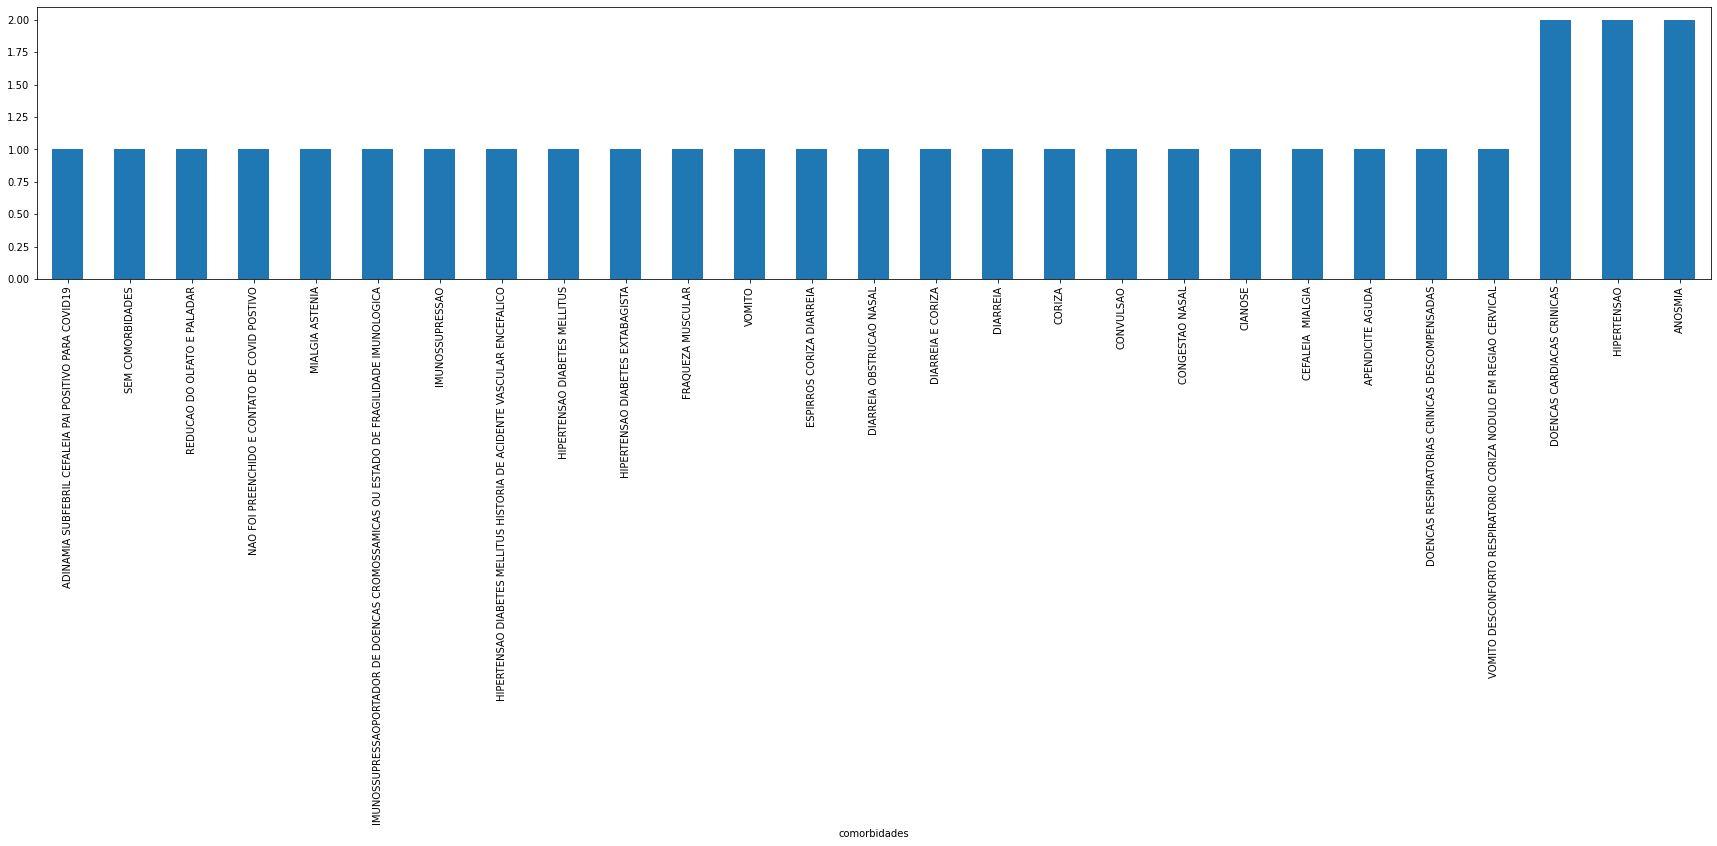

In [87]:
plotar_comorbidades(recuperados)

**Transmissores**

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


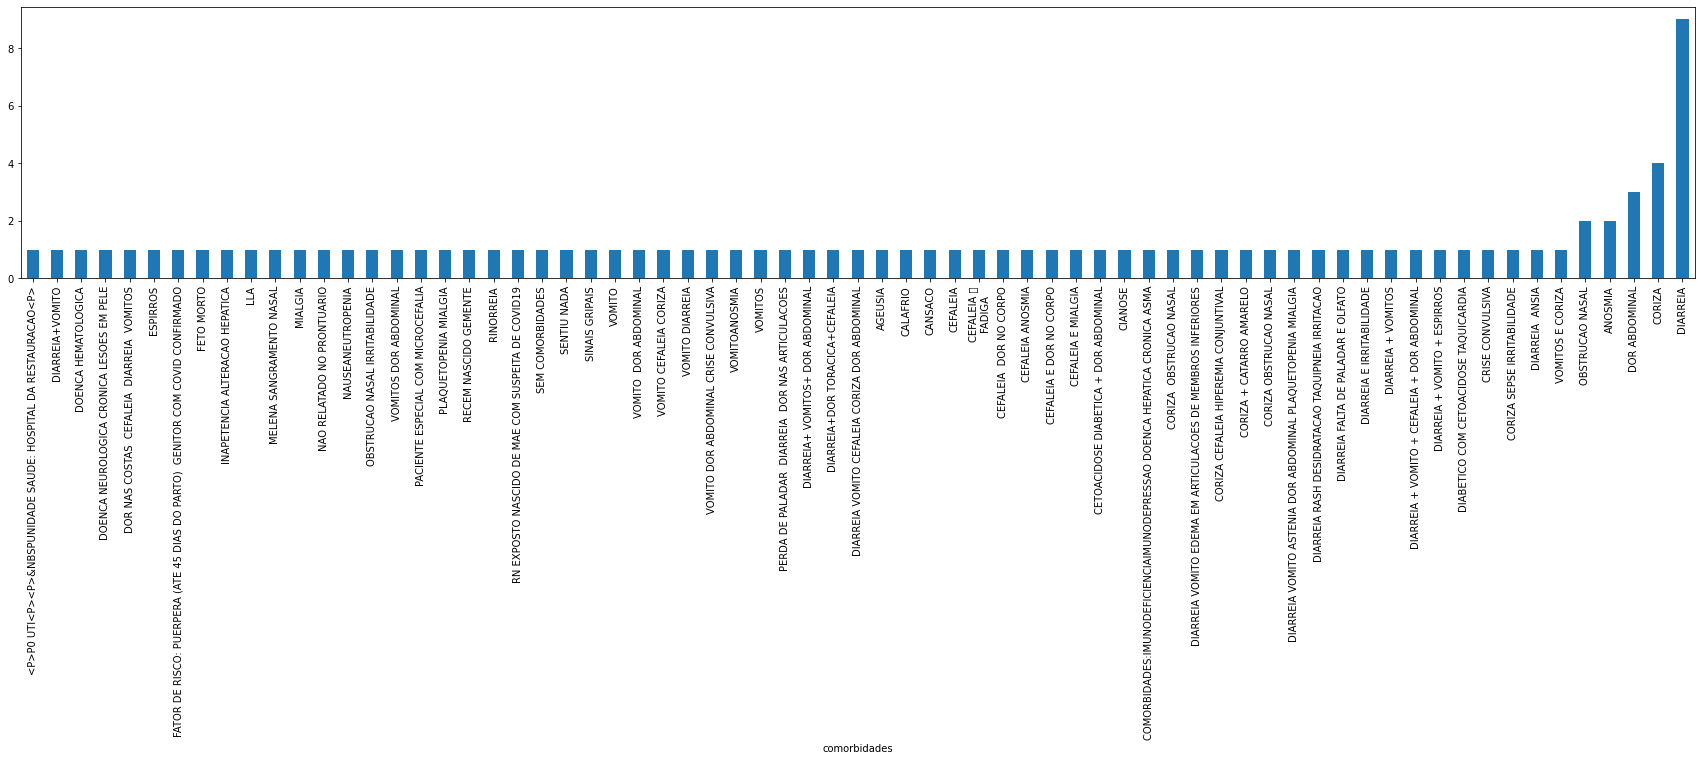

In [88]:
plotar_comorbidades(transmissores)



> **Isolamento**



/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


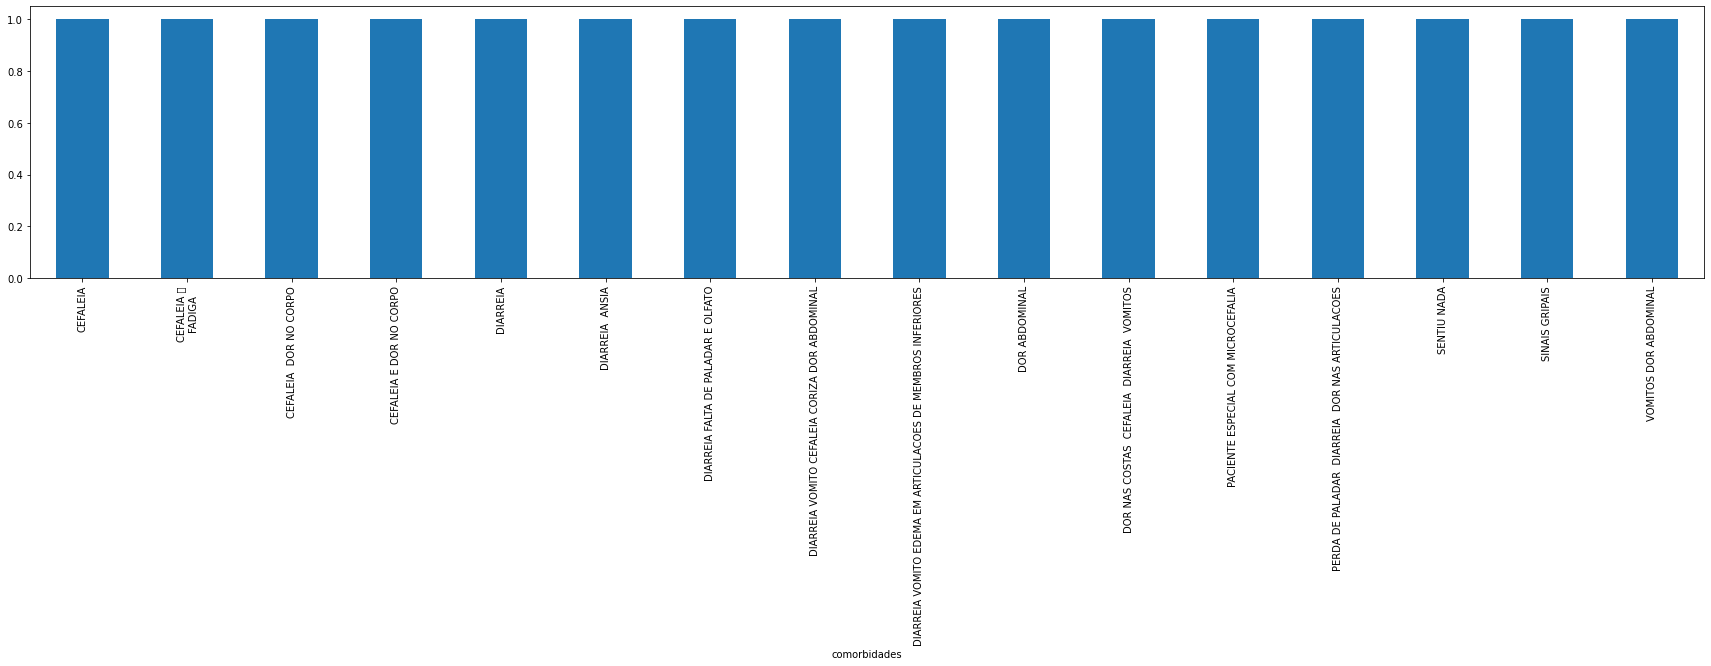

In [89]:
plotar_comorbidades(isolamento)

> **Enfermaria**



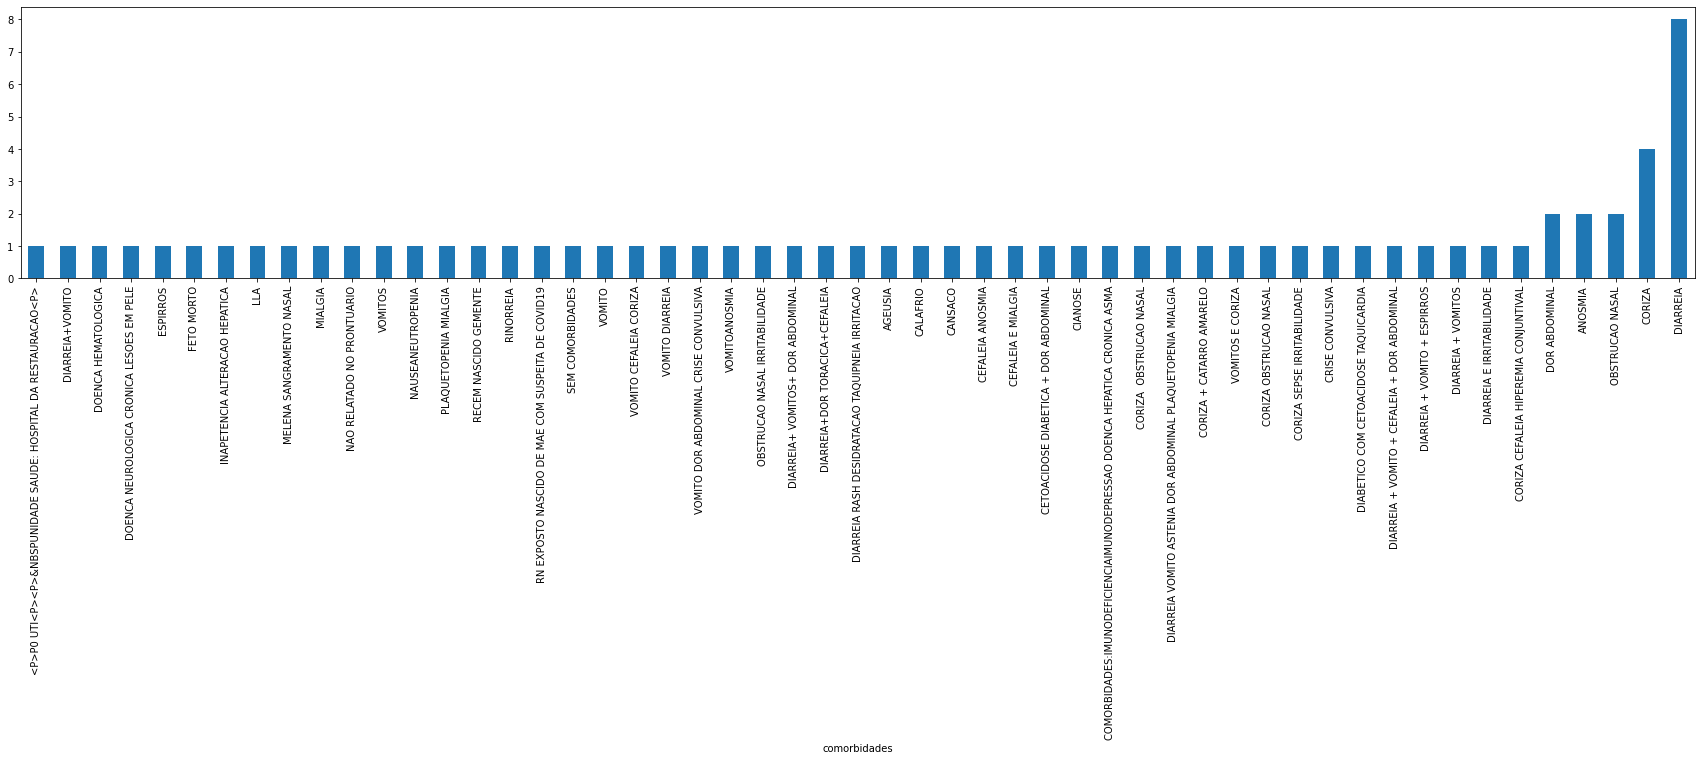

In [90]:
plotar_comorbidades(enfermaria)

> **UTI**



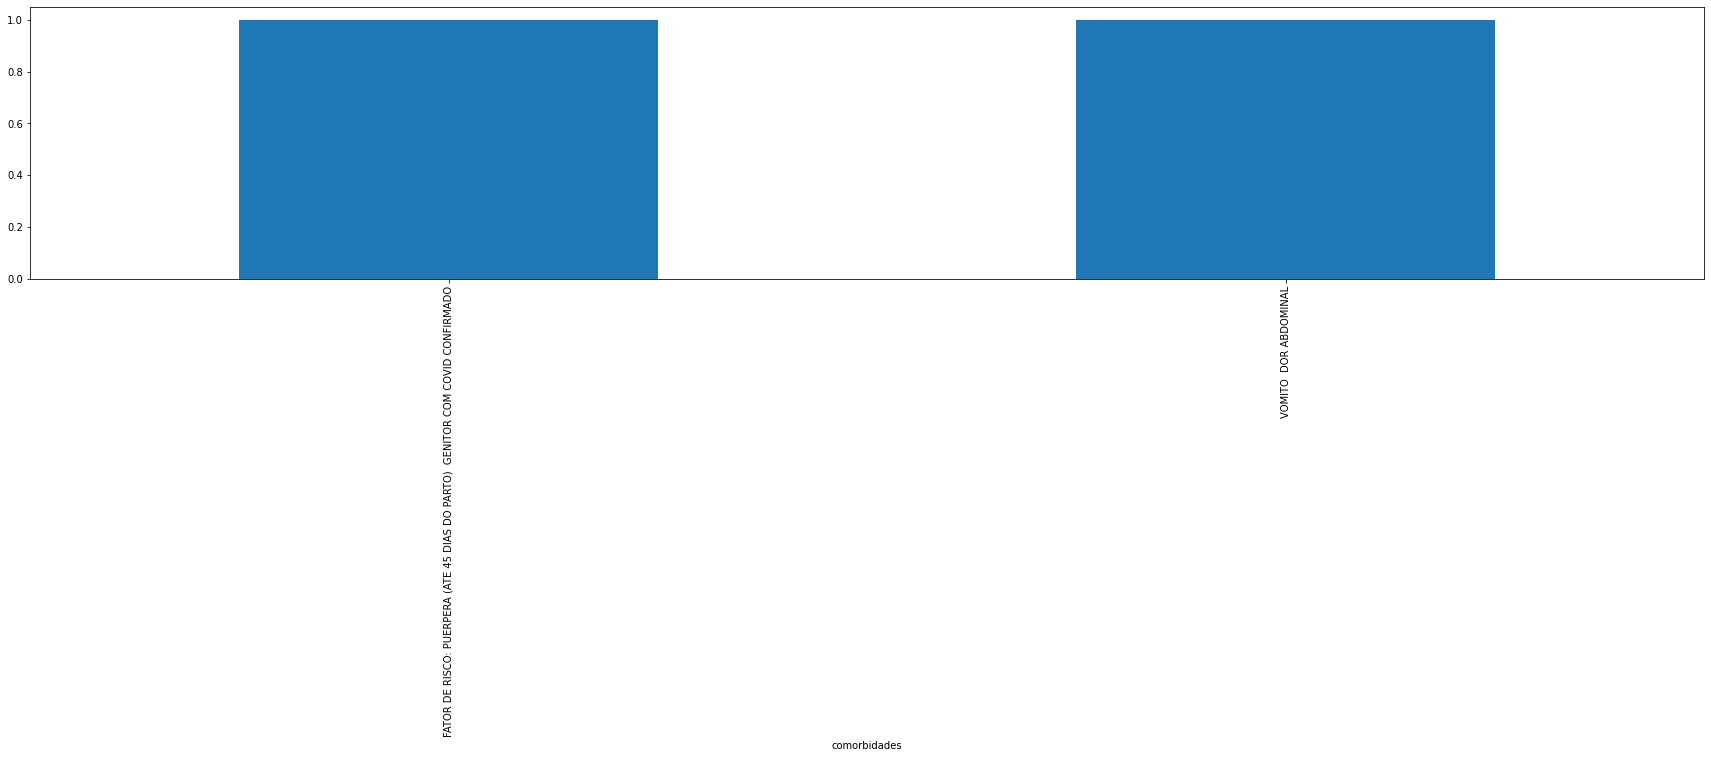

In [91]:
plotar_comorbidades(uti)

##**Data do óbito**
O gráfico de barras apresenta, para cada semana especificada na legenda, o número de óbitos que ocorreram em cada faixa etária.

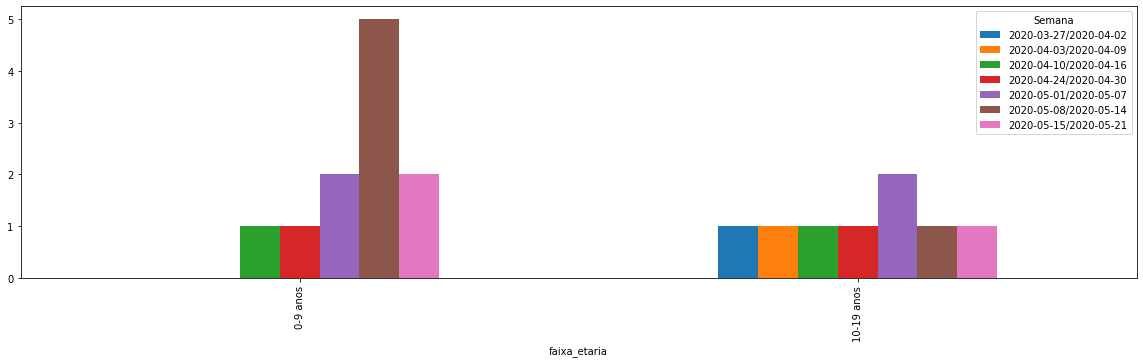

In [92]:
dt_obito = obito.copy()
dt_obito['dt_obito']=pd.to_datetime(dt_obito['dt_obito'])
dt_obito['Semana'] = dt_obito['dt_obito'].dt.to_period('W-THU')
dt_obito.groupby(['Semana', 'faixa_etaria']).size().unstack(0).plot.bar(figsize=(20,5))

##**Dias para o óbito**
O gráfico de barras apresenta a quantidade de pacientes que vieram a óbito, considerando a diferença de dias entre o primeiro sintoma e a data do óbito.

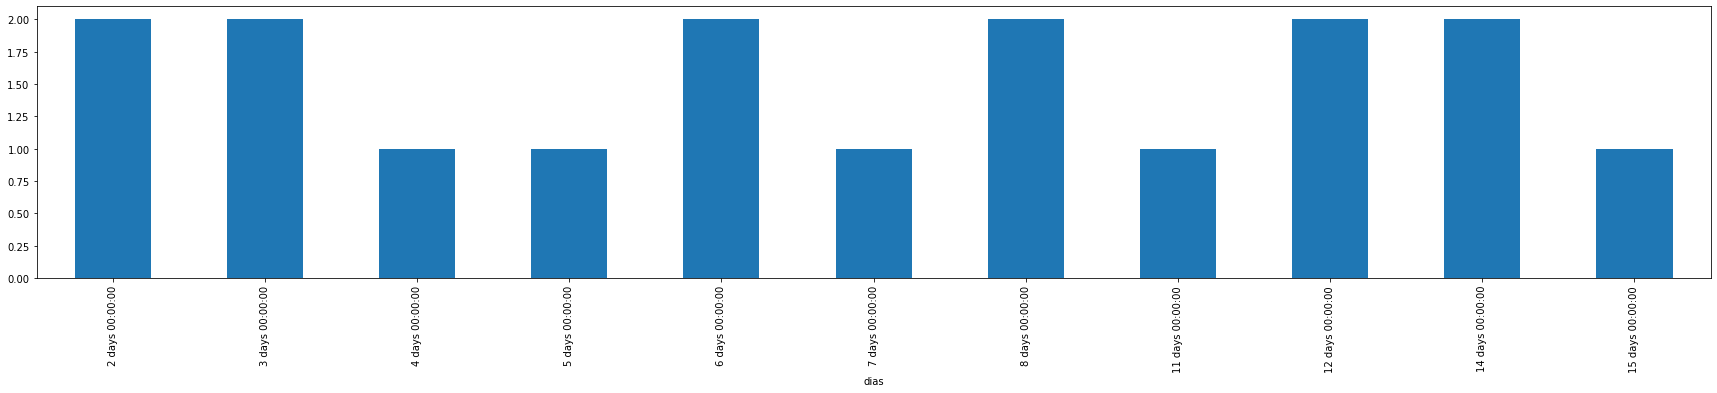

In [93]:
tempo = obito.copy()
tempo['dt_obito']=pd.to_datetime(tempo['dt_obito'])
tempo['dt_primeiros_sintomas']=pd.to_datetime(tempo['dt_primeiros_sintomas'])
tempo['dias'] = abs(tempo['dt_obito'] - tempo['dt_primeiros_sintomas'])
dias = tempo.groupby('dias')
dias.size().plot.bar(figsize=(30,5))

##**Hospitalização**

In [0]:
def plotar_hospitalizacao(grupo):
  hospitalizacao = grupo.groupby('hospitalizacao').size()
  hospitalizacao.plot.bar()
  print(hospitalizacao)

**Óbito**

hospitalizacao
NAO     5
SIM    13
dtype: int64


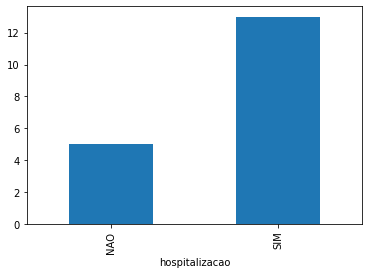

In [95]:
plotar_hospitalizacao(obito)

**Recuperados**

hospitalizacao
NAO    60
SIM    30
dtype: int64


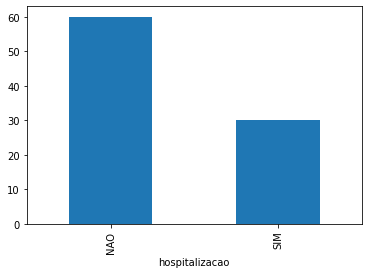

In [96]:
plotar_hospitalizacao(recuperados)

**Transmissores**

hospitalizacao
NAO     22
SIM    144
dtype: int64


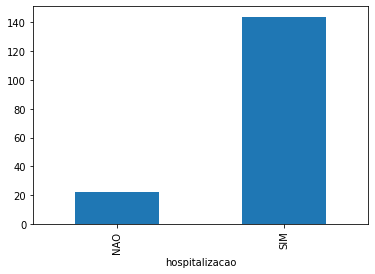

In [97]:
plotar_hospitalizacao(transmissores)

##**Município**

In [0]:
def plotar_municipio(grupo):
  municipio = grupo.groupby('municipio').size()
  if len(municipio) > 0:
    municipio.sort_values(inplace=True)
    municipio.plot.bar(figsize=(30,5))
  else:
    print('Não há indivíduos neste grupo!')

**Óbito**

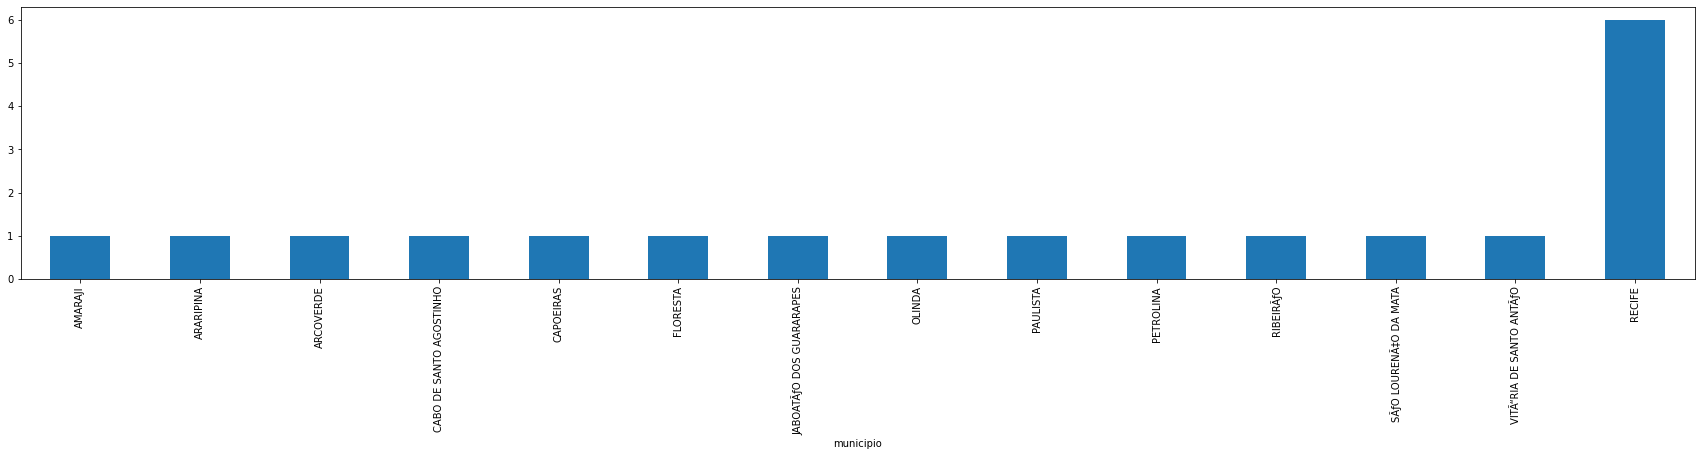

In [99]:
plotar_municipio(obito)

**Recuperados**

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


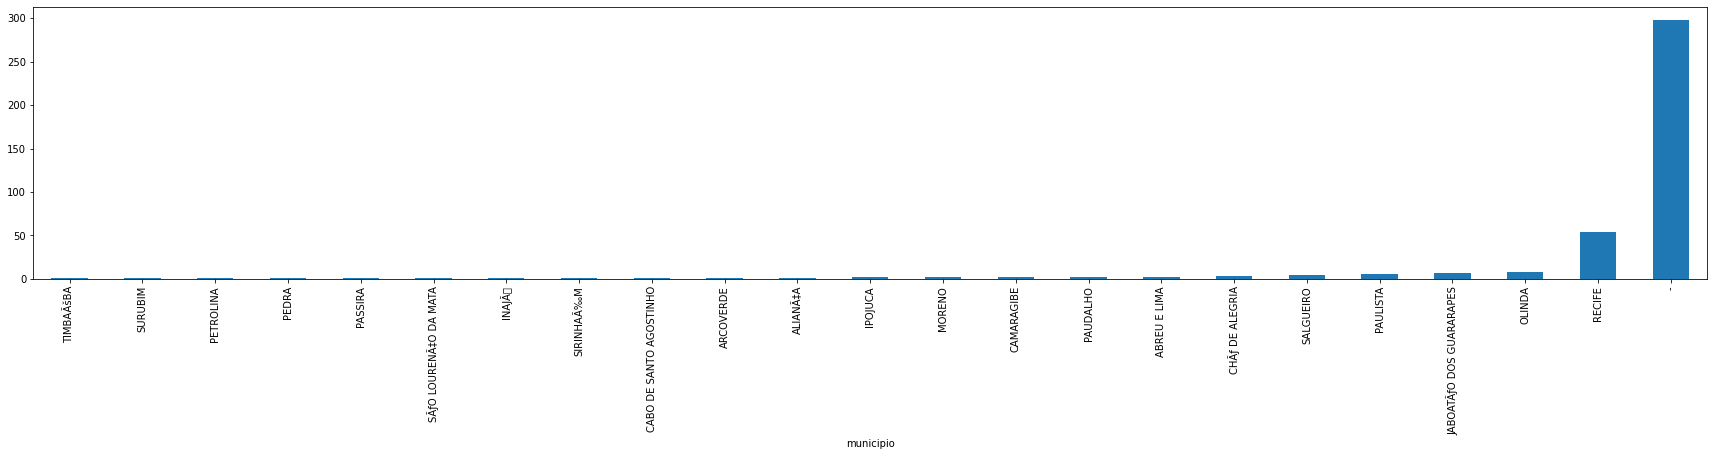

In [100]:
plotar_municipio(recuperados)

**Transmissores**

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


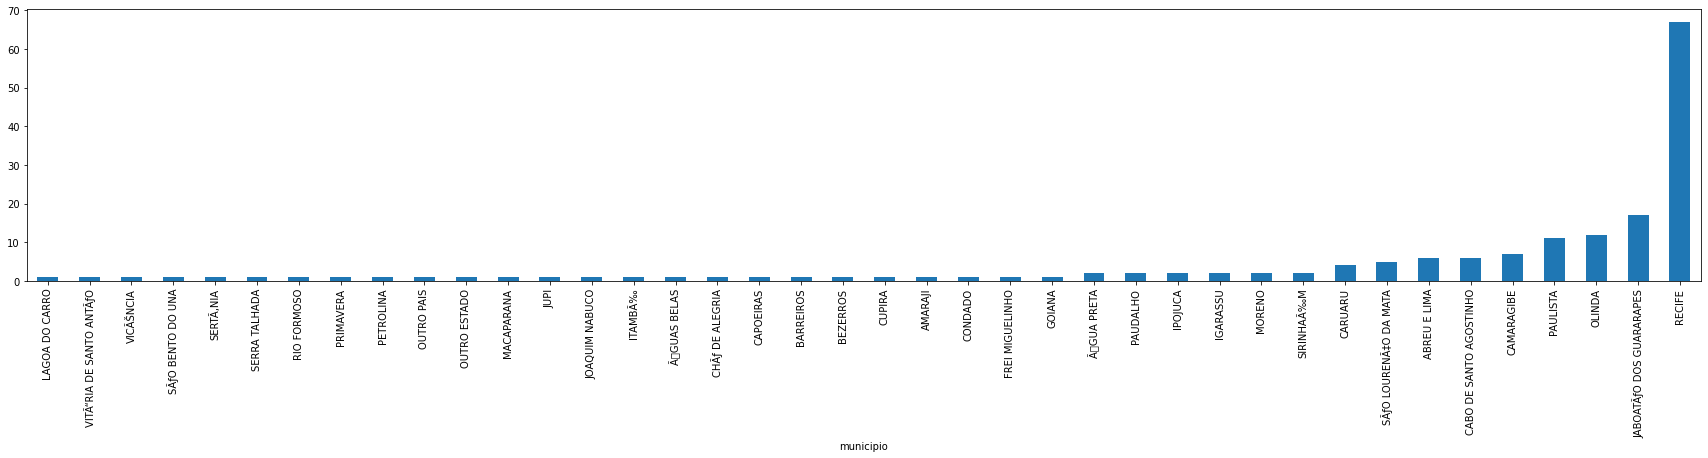

In [101]:
plotar_municipio(transmissores)



> **Isolamento**



/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


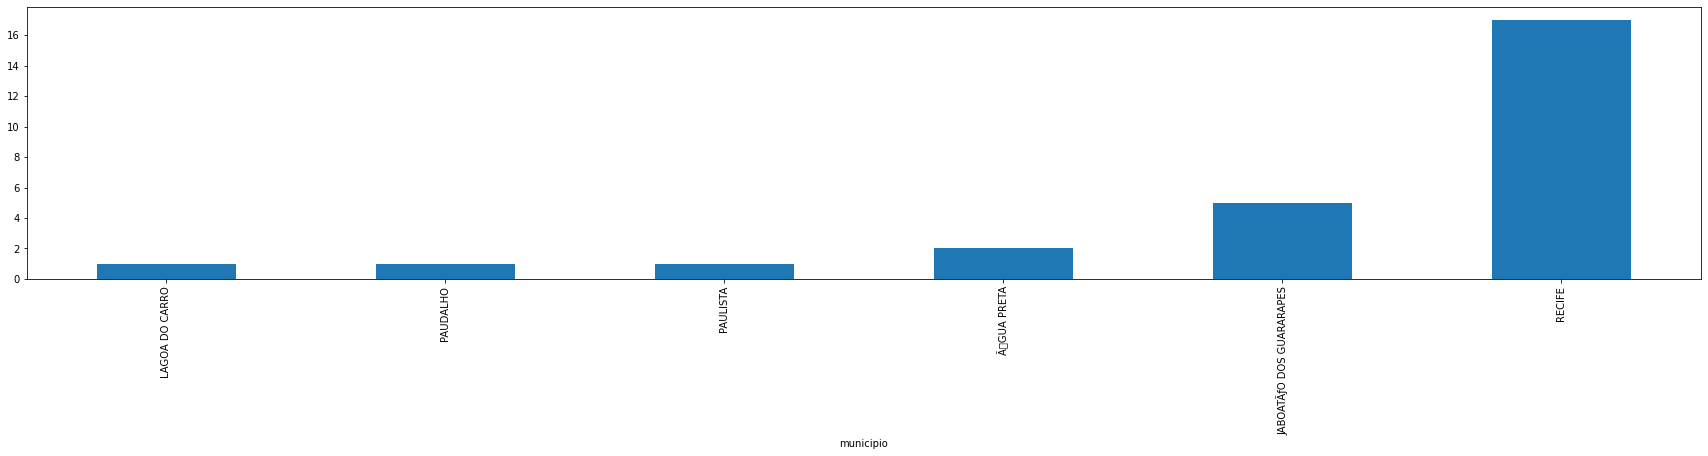

In [102]:
plotar_municipio(isolamento)

> **Enfermaria**



/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


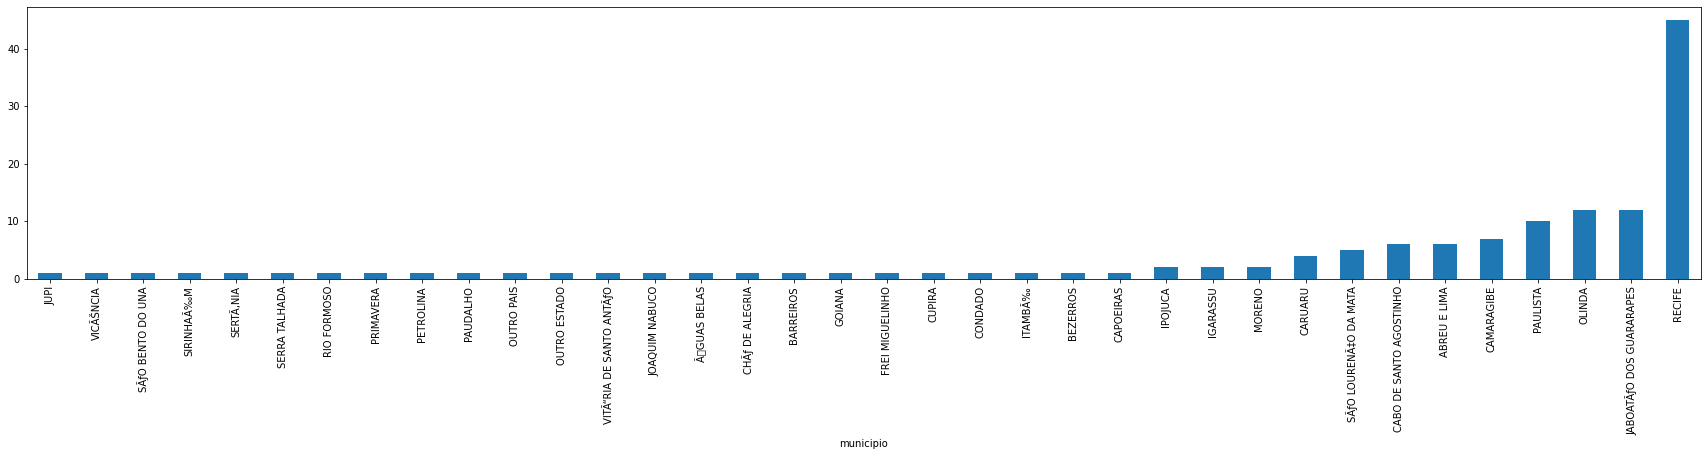

In [103]:
plotar_municipio(enfermaria)

> **UTI**



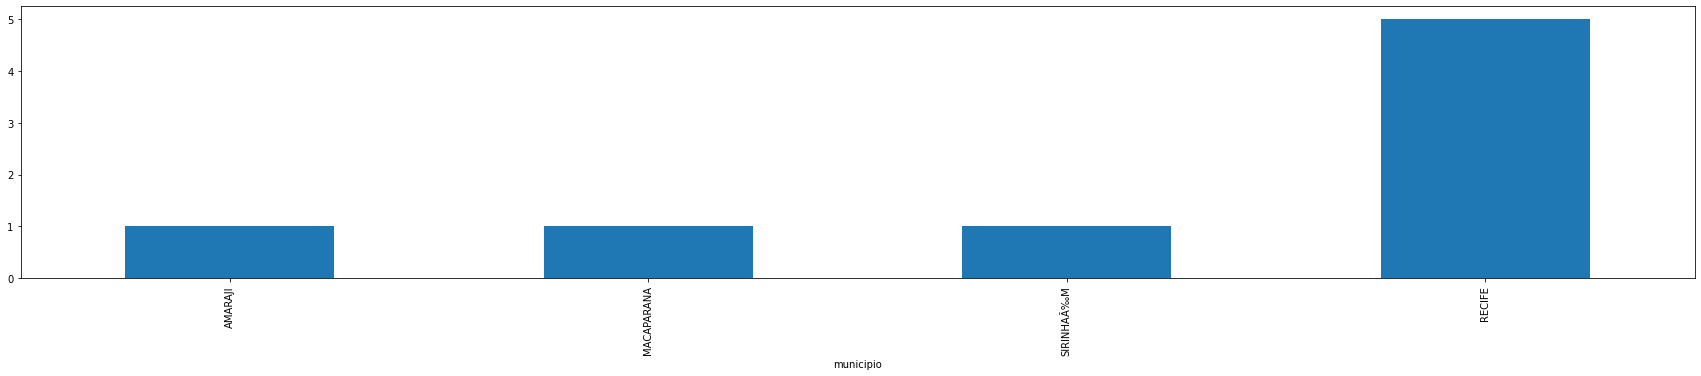

In [104]:
plotar_municipio(uti)

##**Sexo**

In [0]:
def plotar_sexo(grupo):
  sexo = grupo.groupby('Sexo').size()
  if len(sexo) > 0:
    sexo.plot.bar()
    print(sexo)
  else:
    print('Não há indivíduos neste grupo!')

**Óbito**

Sexo
FEMININO     10
MASCULINO     9
dtype: int64


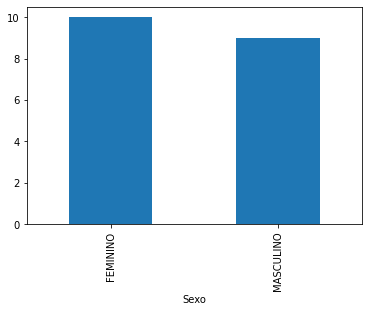

In [106]:
plotar_sexo(obito)

**Recuperados**

Sexo
FEMININO     213
MASCULINO    188
dtype: int64


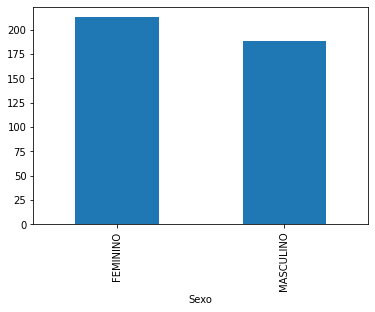

In [107]:
plotar_sexo(recuperados)

**Transmissores**

Sexo
FEMININO     94
MASCULINO    78
dtype: int64


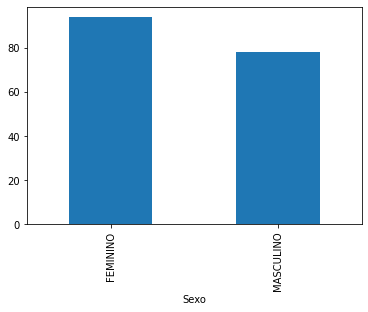

In [108]:
plotar_sexo(transmissores)



> **Isolamento**



Sexo
FEMININO     17
MASCULINO    10
dtype: int64


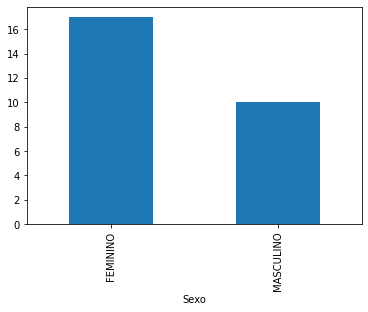

In [109]:
plotar_sexo(isolamento)

> **Enfermaria**



Sexo
FEMININO     72
MASCULINO    65
dtype: int64


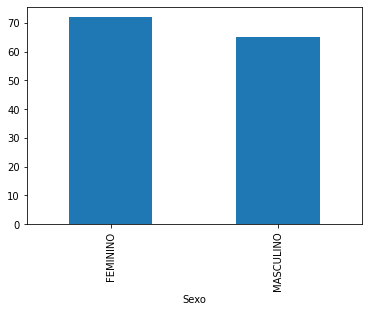

In [110]:
plotar_sexo(enfermaria)

> **UTI**



Sexo
FEMININO     5
MASCULINO    3
dtype: int64


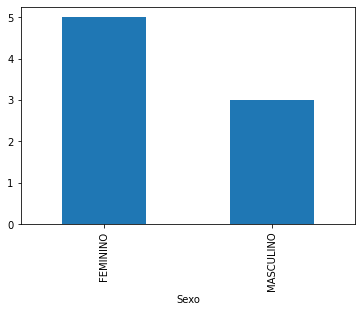

In [111]:
plotar_sexo(uti)

##**Sintomas**

In [0]:
def plotar_sintomas(grupo):
  sintomas = grupo.groupby('sintomas').size()
  if len(sintomas) > 0:
    sintomas.sort_values(inplace=True)
    sintomas.plot.bar(figsize=(30,5))
  else:
    print('Não há indivíduos neste grupo!')

**Óbito**

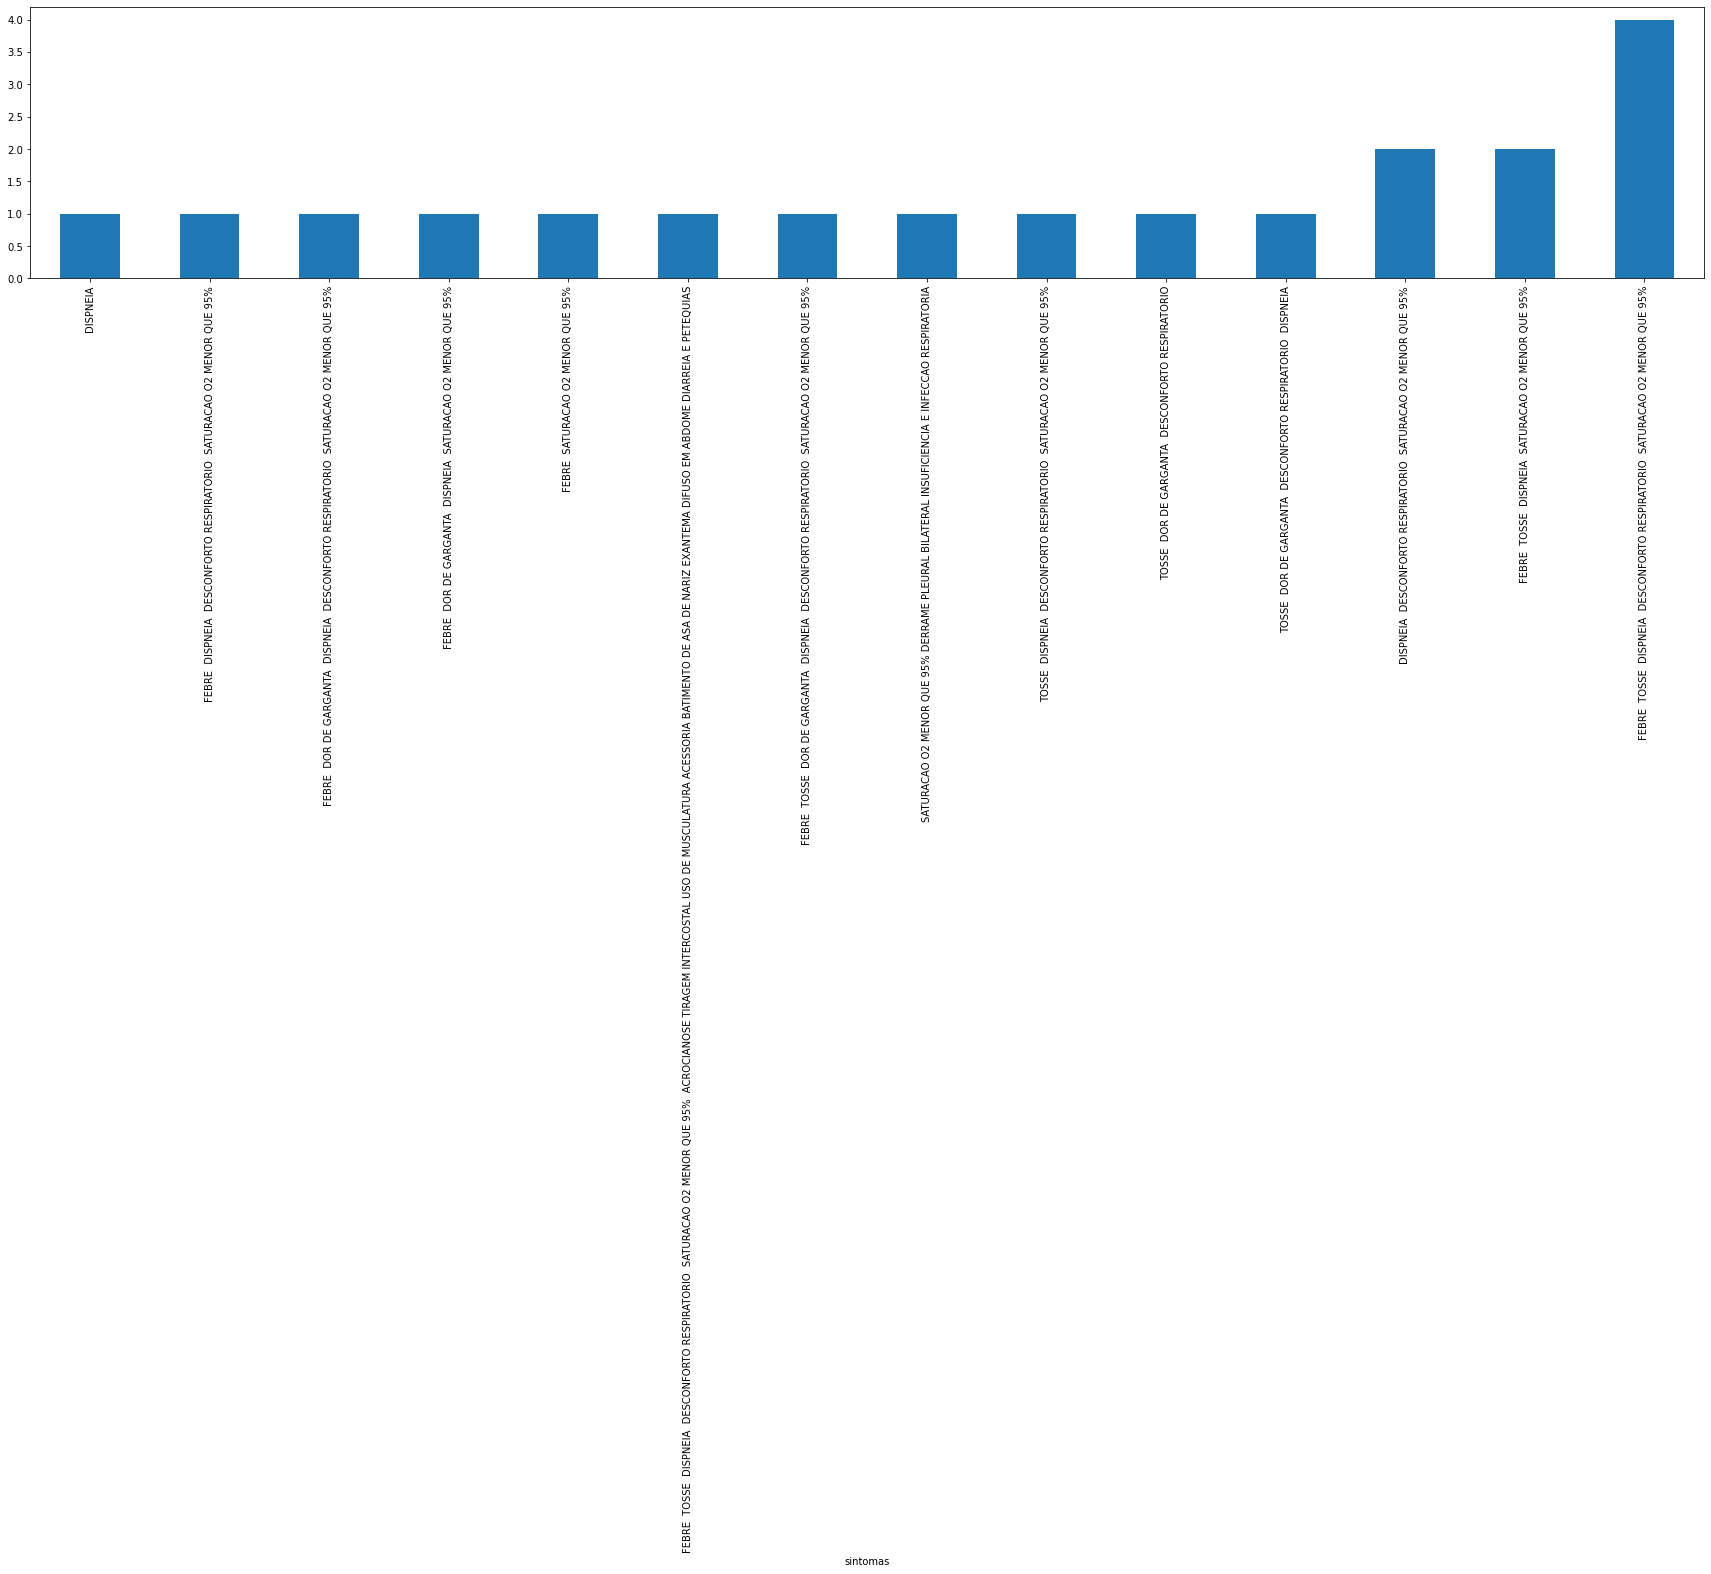

In [113]:
plotar_sintomas(obito)

**Recuperados**

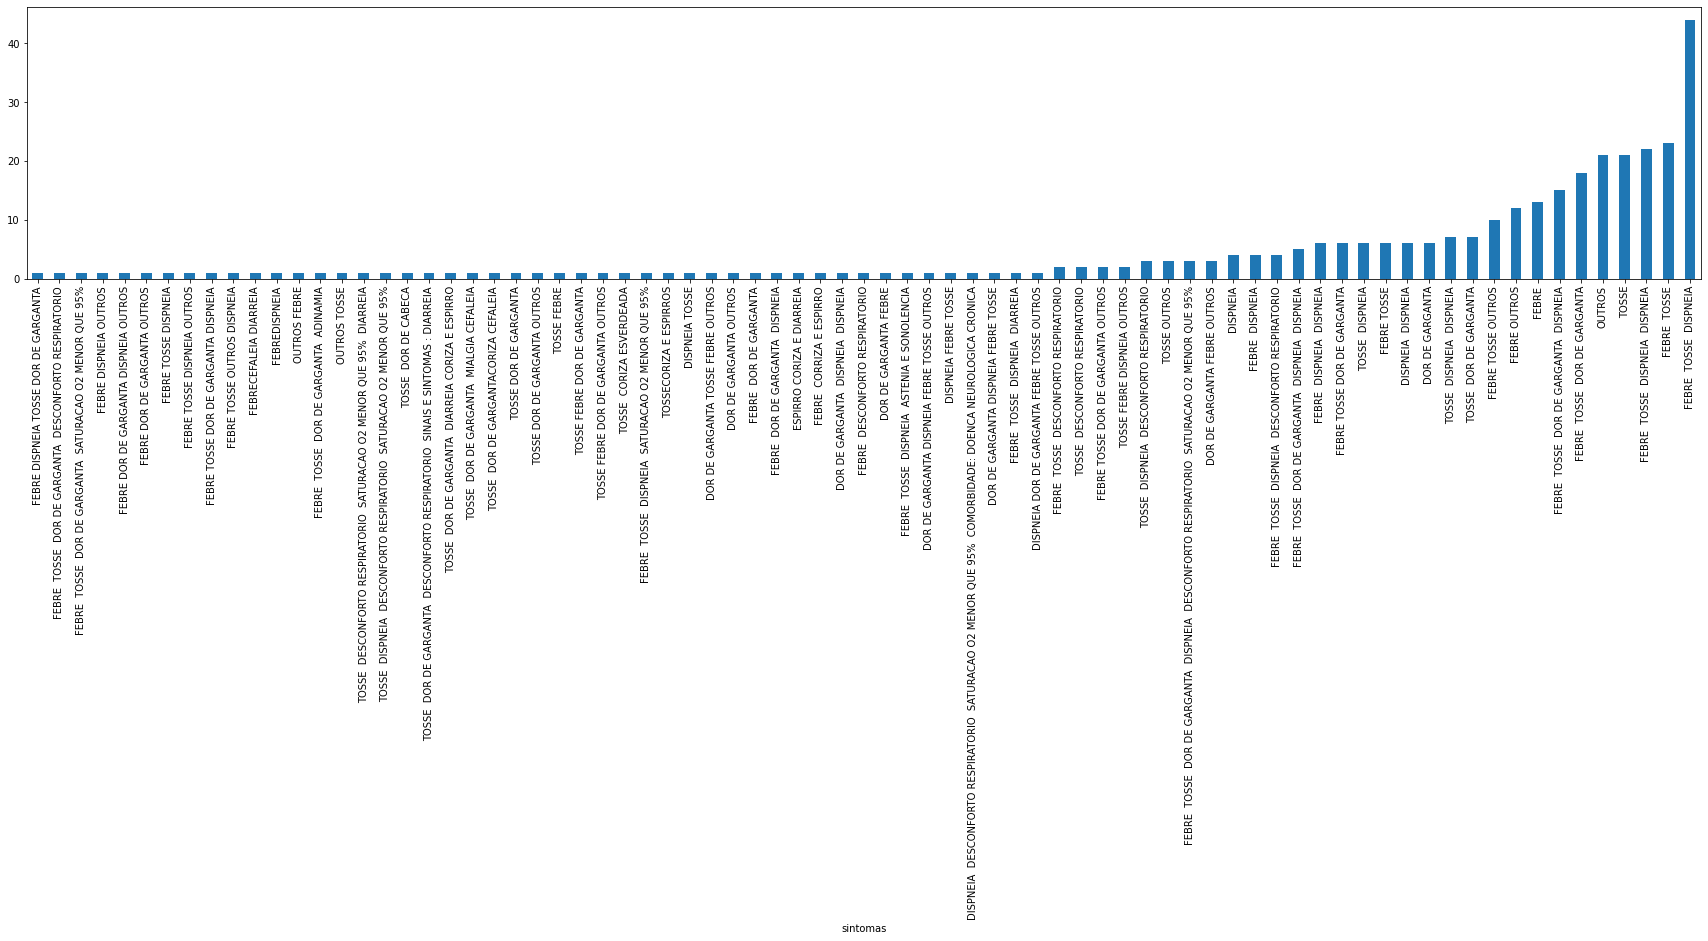

In [114]:
plotar_sintomas(recuperados)

**Transmissores**

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


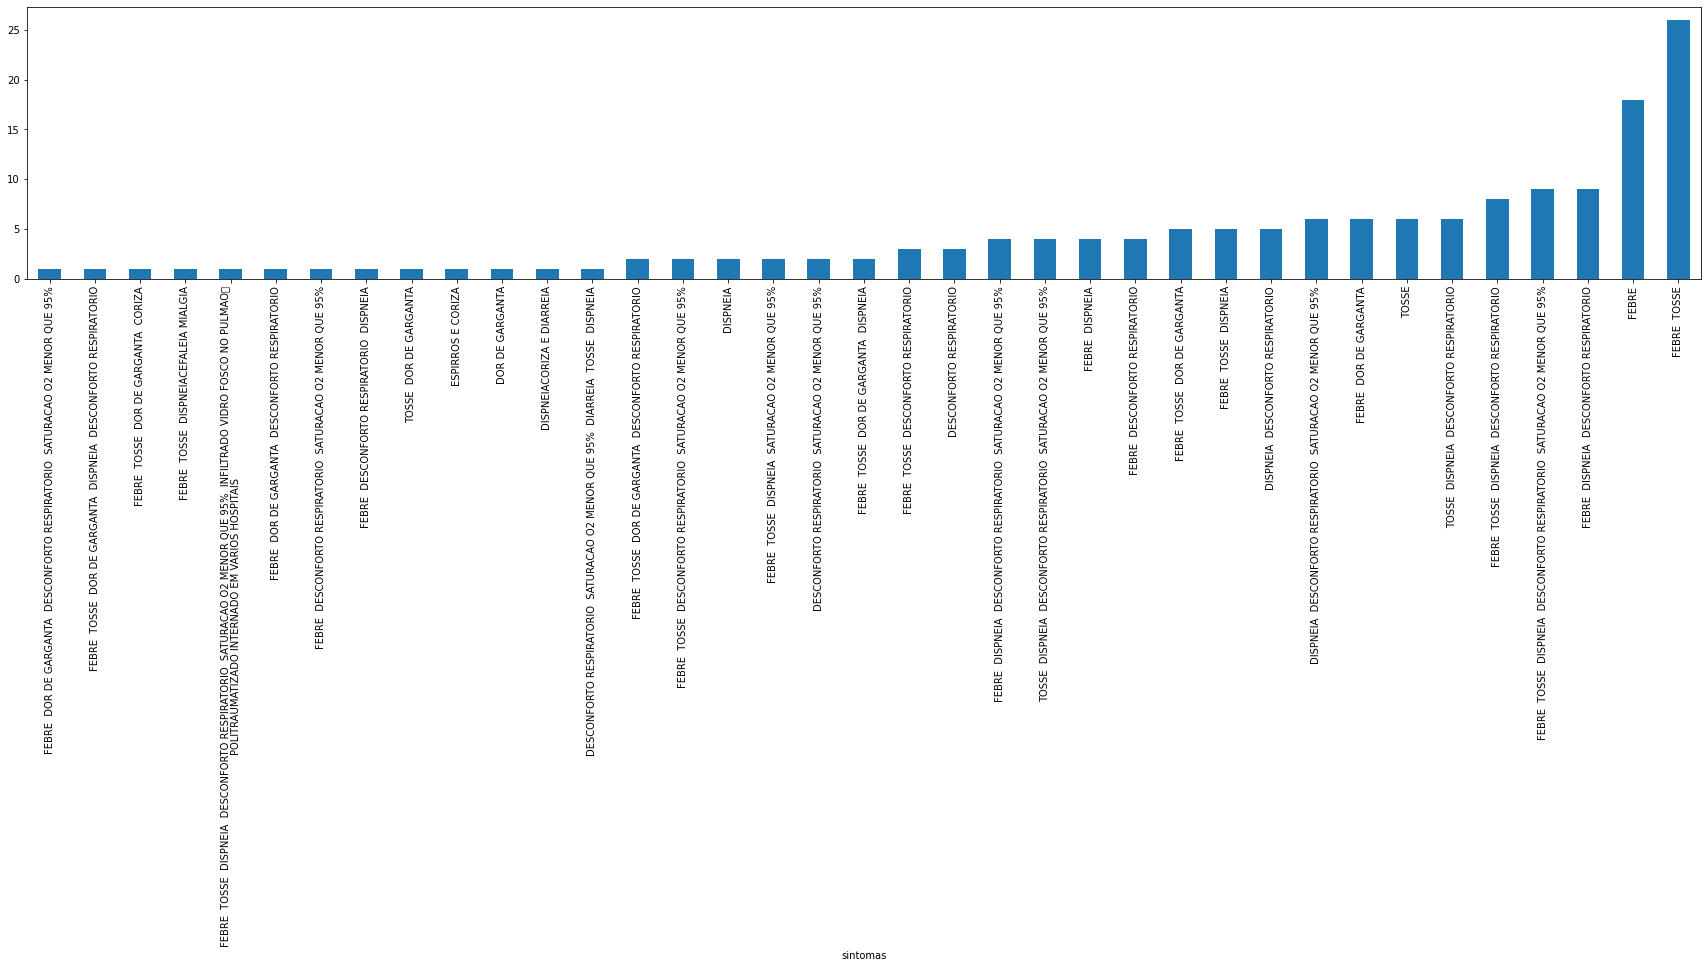

In [115]:
plotar_sintomas(transmissores)



> **Isolamento**



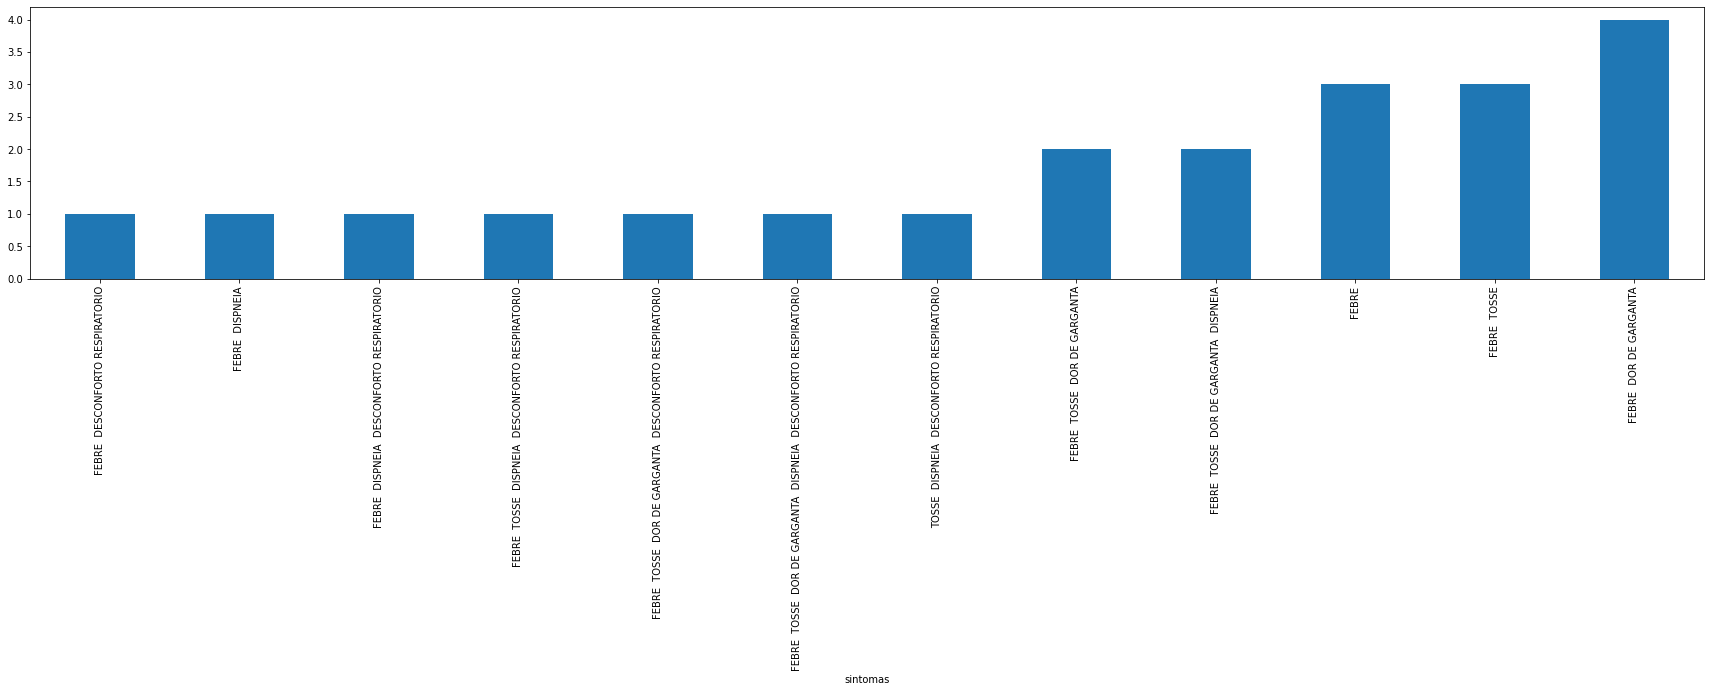

In [116]:
plotar_sintomas(isolamento)



> **Enfermaria**



/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


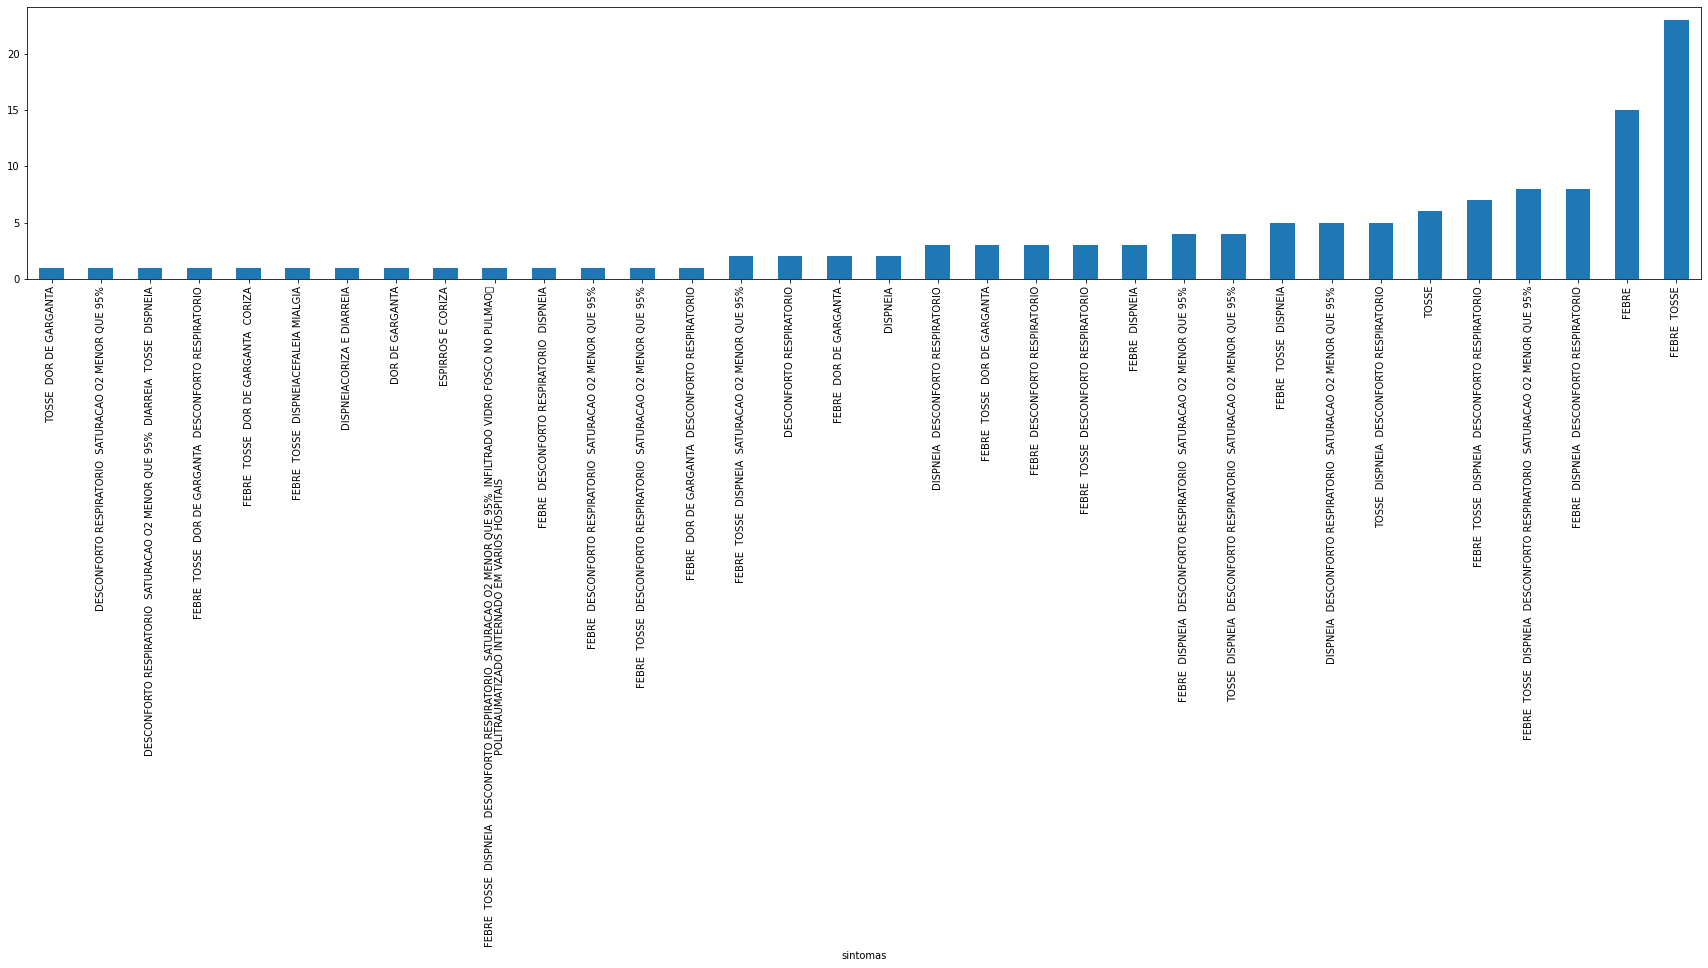

In [117]:
plotar_sintomas(enfermaria)



> **UTI**



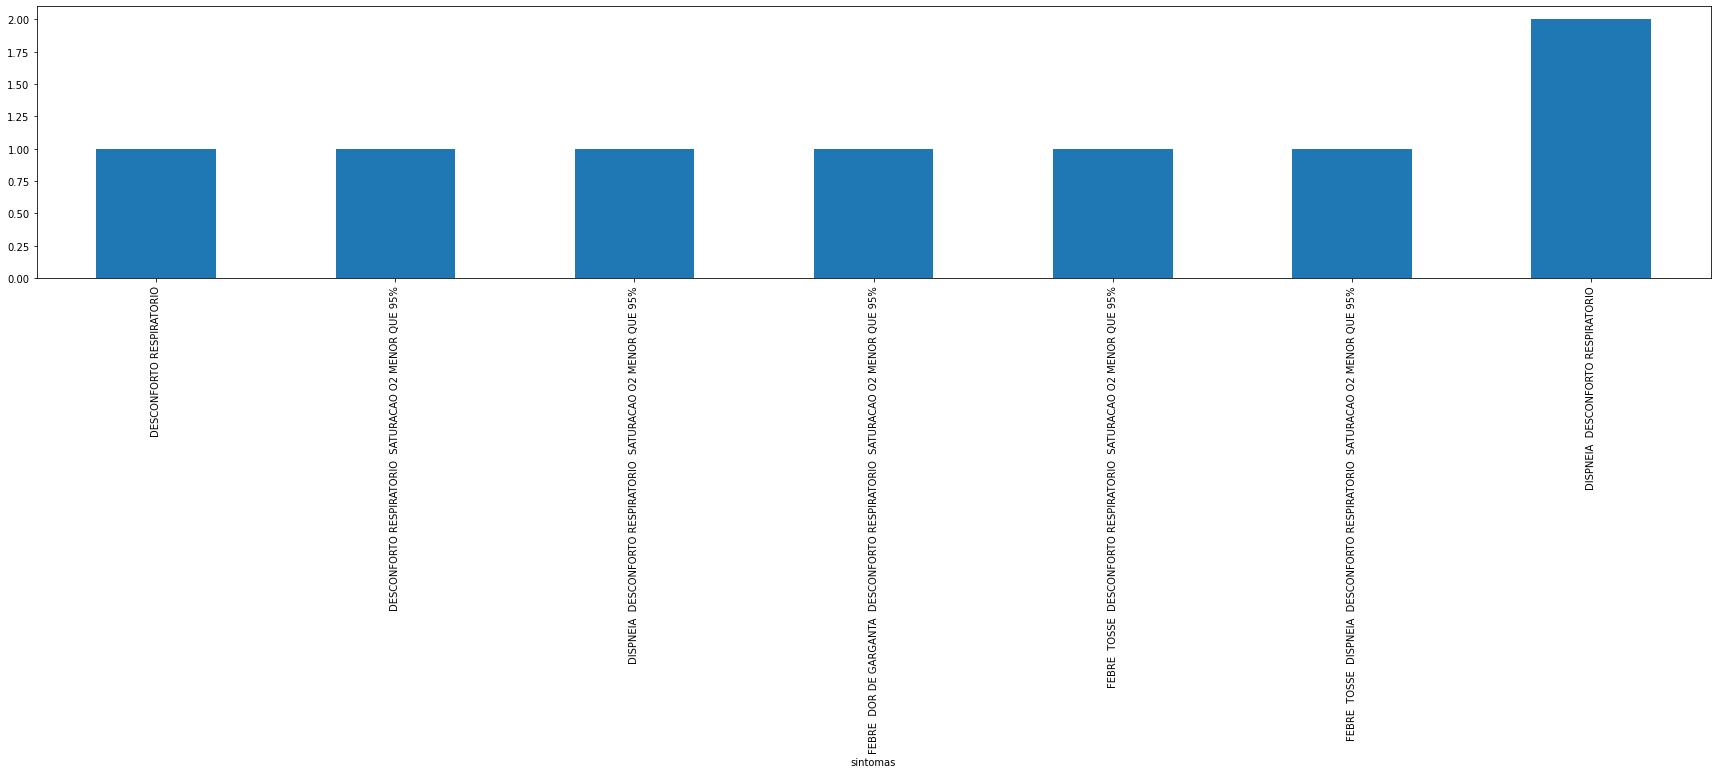

In [118]:
plotar_sintomas(uti)